## Training a Neural Network in TensorFlow

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.datasets import make_blobs
np.set_printoptions(precision=2)

In [21]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X, Y = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

In [22]:
model = Sequential(
    [
        Dense(units = 25, activation = 'sigmoid' ),
        Dense(units = 15, activation = 'sigmoid' ),
        Dense(units = 1, activation = 'sigmoid' )
    ]
)

In [23]:
model.compile(loss=BinaryCrossentropy())
model.fit(X,Y,epochs=100) #-> epochs= number of steps in gradient descent

Epoch 1/100

4/4 [==============================] - 0s 3ms/step - loss: 0.4298
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2690
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1333
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0397
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: -0.0398
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: -0.1077
Epoch 7/100
4/4 [==============================] - 0s 787us/step - loss: -0.1803
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: -0.2632
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: -0.3417
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: -0.4002
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: -0.4627
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: -0.5237
Epoch 13/100
4/4 [==============================] 

### Training details

### Logistic regression
1. Specify how to compute output given x, w, b (define model)
 - Manual: g( np.dot(w,x) + b )
 - TF: model = Sequential(Dense(),Dense(),...)
2. Specify loss $L(f_{w,b}(\vec{x},y))$ and cost $J(\vec{w},b)$
 - Manual: Calculations using formula above, i.e. loss = -y * np.log(f_x) - (1-y) * np.log(1-f_x)
 - TF: model.compile(loss=BinaryCrossentropy())

3. Train on data to minimise $J(\vec{w},b)$
 - Manual: Gradient descent, i.e. w = w - alpha * dj_dw ; b = b - alpha * dj_db 
 
 - TF: model.fit(X, y, epochs = 100)

#### Loss and cost functions
- Logistic regression (binary classification) - BinaryCrossentropy
- Regression (Predicting numbers and not categories) - MeanSquaredError()

#### Gradient Descent
Repeat reducing w and b by alpha * derivative
- In TensorFlow, the partial derivative terms for gradient descent are calculated using "back propagation"
- Implemented in model.fit(X,y, epochs = 100)

### Alternatives to sigmoid activation
#### Demand prediction example
1.   
 - Awareness parameter might not necessarily be 0 or 1, might be function g(z) = max(0,z)
 - goes by name ReLU (Rectified Linear Unit)

2.  Linear Activation function g(z) = z
 
3. Softmax activation function

4. Others: softplus, softsign, tanh, exponential


### Choosing activation functions

- Often only one natural choice for output layer
1.  (1,0) If binary classification, output layer almost always is **sigmoid** (P(1))
2.  (+, -)If regression for non negative and negative, output layer uses **linear** activaiton function
3.  (+) If only positive values, use **ReLU**

**For hidden layers, most common activation function is ReLU**, except binary classification  
WHY?   
- ReLU is easier to compute compared to sigmoid
- ReLU goes flat to the left of the graph, sigmoid has flat on both sides
- Gradient descent easier to run, really slow on sigmoid
- In short, ReLU trains neural networks faster

Code: `Dense(units=25, activation='relu'/'sigmoid'/'linear')`


### Why are activation functions are so important?



- If all are linear, its just linear regression, and cannot fit anything more complex in neural networks
- If all linear, and output sigmoid, its just logistic regression

## Multiclass classification problem

- target `y` can take on more than two possible output labels
- Binary classifcation - $P(y = 1 | \vec{x})$ / $P(\bar{1})$
- Multiclass classification- $P(y = 1 | \vec{x})$ $P(y = 2 | \vec{x})$ $P(y = 3 | \vec{x})$ ....
- **Softmax regression algorithm**-  generalisation of logistic regression algorithm

### Softmax regression algorithm


- For multiclass problems

- Label 1: $z_1 = \vec{w}_1 \centerdot \vec{x} + b_1$
- Label 2: $z_2 = \vec{w}_2 \centerdot \vec{x} + b_2$
- Label 3: $z_3 = \vec{w}_3 \centerdot \vec{x} + b_3$
- Label 4: $z_4 = \vec{w}_4 \centerdot \vec{x} + b_4$

$$a_1 = \frac{e^{z_1}}{e^{z_1}+e^{z_2}+e^{z_3}+e^{z_4}} = P(y = 1 | \vec{x})$$
$$a_2 = \frac{e^{z_2}}{e^{z_1}+e^{z_2}+e^{z_3}+e^{z_4}} = P(y = 2 | \vec{x})$$
$$a_3 = \frac{e^{z_3}}{e^{z_1}+e^{z_2}+e^{z_3}+e^{z_4}} = P(y = 3 | \vec{x})$$
$$a_4 = \frac{e^{z_4}}{e^{z_1}+e^{z_2}+e^{z_3}+e^{z_4}} = P(y = 4 | \vec{x})$$
      




General case: $z_j = \vec{w}_j \centerdot \vec{x} + b_j$ ; $j = 1,..., N$  
parameters: $w_1, w_2, w_3, ... w_n$ ; $b_1, b_2, b_3, ... w_n$
$$a_j = \frac{e^{z_j}}{\sum_{k=1}^N {e^{z_k}}} = P(y = j | \vec{x})$$


<img align="Left" src="./images/Wk5_1.png"  style=" width:600px; padding: 10px 20px ; ">


### Neural network with softmax output

### <span style= "color:red"> Dont use version shown here but recommended version later! </span>

#### 1. Specify model

In [24]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='softmax') #10 output units
])

#### 2. Specify loss and cost

In [1]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(loss = SparseCategoricalCrossentropy()) #sparse - y can only take 1 categorical value

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'model' is not defined

#### 3. Train on data

In [26]:
model.fit(X, Y, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 2.2519
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 2.0722
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 1.9399
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 1.8180
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7133
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 1.6131
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 1.5124
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.4154
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 1.3225
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2367
Epoch 11/100
4/4 [==============================] - 0s 809us/step - loss: 1.1568
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0809
Epoch 13/100
4/4 [==============================] - 0s 2ms/

### Improved implementation of softmax

Problems with above implementation:  
- Numerical Roundoff Errors
- How to overcome: 
 - Logistic Regression:  `model.compile(loss=BinaryCrossentropy(from_logits=True))` - compute z directly instead of separately
 - Softmax Regression: `model.compile(loss=SparseCrossentropy(from_logits=True))`

In [41]:
#Softmax Regression

model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=4, activation='linear') #CHANGED TO LINEAR
])

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True))
model.fit(X, Y, epochs=100) #now output is not a1-a10, but z1-z10

logits = model(X)
f_x = tf.nn.softmax(logits) #map output to softmax




Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 1.4268
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2449
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1306
Epoch 4/100
4/4 [==============================] - 0s 817us/step - loss: 1.0520
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9848
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9322
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8804
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8332
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7911
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7523
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7133
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6812
Epoch 13/100
4/4 [==============================] - 0s 1ms/

In [42]:
print(f"unique classes {np.unique(Y)}")

unique classes [0 1 2 3]


## Multi-label Classification
###### Classification with multiple Outputs
- Different from **Multi-CLASS Classification**

Eg: GIven a picture,  
is there a car? (Yes,No)   
is there a bus? (Yes,No)    
is there a pedestrian? (Yes,No)   

Output y = [1 0 1]

Solution: Train one neural network with three outputs, as opposed to three neural networks
<img align="Left" src="./images/Wk5_2.png"  style=" width:600px; padding: 10px 20px ; ">

### Advanced Optimisation
- Besides gradient descent, there are much faster optimisation algorithms
- One of those is the **"Adam" algorithm** which adjusts learning rate accordingly
<img align="Left" src="./images/Wk5_3.png"  style=" width:600px; padding: 10px 20px ; ">

### Adam Algorithm Intuition

Adam: Adaptive Moment Estimation (not just one $\alpha$)

- If $w_j$ or $b$ keeps moving in same direction, increase $\alpha_j$
- If $w_j$ or $b$ keeps oscillating, decrease $\alpha_j$
- Accomplish this by modifying compile code:  
`model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimiser = tf.keras.optimizers.Adam(learning_rate=1e-3))`
- Learning rate set is default global learning rate and might need slight tuning


### Additional Layer Types
1. Dense Layer: Each neuron output is a function of all the activation outputs of the previous layer.
2. Convolutional Layer: 
 - Neuron output only looks at part of the previous layer's inputs.
 - Why?
  1. Faster Computation
   2. Need less training data (less prone to overfitting)



# Number Classification

In [45]:
from autils import *

# load dataset
X, y = load_data()

In [49]:
model = Sequential(
    [               
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation="relu", name="L1"),
        tf.keras.layers.Dense(15, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
    ], name = "my_model" 
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 0s 778us/step - loss: 1.6088
Epoch 2/40
157/157 [==============================] - 0s 764us/step - loss: 0.7071
Epoch 3/40
157/157 [==============================] - 0s 755us/step - loss: 0.4831
Epoch 4/40
157/157 [==============================] - 0s 752us/step - loss: 0.3745
Epoch 5/40
157/157 [==============================] - 0s 777us/step - loss: 0.3150
Epoch 6/40
157/157 [==============================] - 0s 737us/step - loss: 0.2744
Epoch 7/40
157/157 [==============================] - 0s 794us/step - loss: 0.2468
Epoch 8/40
157/157 [==============================] - 0s 832us/step - loss: 0.2228
Epoch 9/40
157/157 [==============================] - 0s 825us/step - loss: 0.2070
Epoch 10/40
157/157 [==============================] - 0s 788us/step - loss: 0.1881
Epoch 11/40
157/157 [==============================] - 0s 800us/step - loss: 0.1776
Epoch 12/40
157/157 [==============================] - 0s 765us/step - loss: 0.1631
E

1/1 [==============================] - 0s 14ms/step


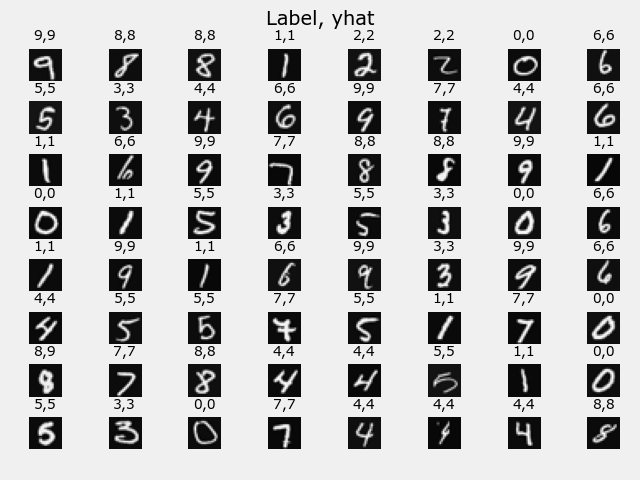

In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8 )
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

157/157 [==============================] - 0s 566us/step
Accuracy: 99.72% (4986/5000)
1/1 [==============================] - 0s 15ms/step
14 errors out of 5000 images


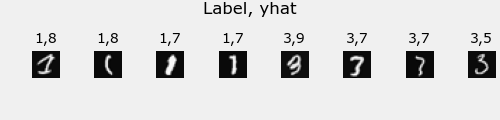

In [91]:
f = model.predict(X)
idxs = np.where(np.argmax(f, axis=1) != y[:,0])[0]
print(f'Accuracy: {(len(X) - len(idxs))/len(X) * 100}% ({(len(X) - len(idxs))}/{len(X)})')
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")
